In [1]:
import datadotworld as dw
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_source = 'dakimova/medicare-partd-tidy-2016'
spend_2017 = dw.query(
    data_source,
    'SELECT * FROM medicare_partD_tidy_2017'
).dataframe.replace(r'^\s+$', np.nan, regex = True)

In [4]:
notnull_17_change = spend_2017[pd.notnull(spend_2017['annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017'])]

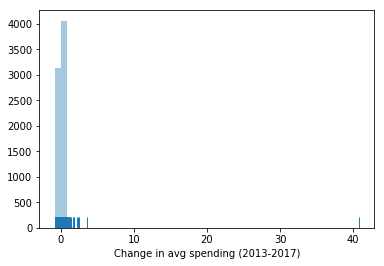

In [5]:
sns.distplot(tuple(notnull_17_change.iloc[:,4]), kde=False, rug=True)
plt.xlabel("Change in avg spending (2013-2017)")
plt.show()

In [6]:
spend_2017[spend_2017['annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017'] > 10]

,brand_name,generic_name,manufacturer,year,annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017,average_spending_per_beneficiary,average_spending_per_claim,average_spending_per_dosage_unit_weighted,change_in_average_spending_per_dosage_unit_2016_2017,total_beneficiaries,total_claims,total_dosage_units,total_spending
30768,virt-nate,"prenatal vit,cal 73/iron/folic",virtus pharmace,2017,40.815609,58.231852,18.071954,0.476876,0.93593,27.0,87.0,3297.0,1572.26


In [7]:
spend_2017[spend_2017['brand_name'] == 'virt-nate']

,brand_name,generic_name,manufacturer,year,annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017,average_spending_per_beneficiary,average_spending_per_claim,average_spending_per_dosage_unit_weighted,change_in_average_spending_per_dosage_unit_2016_2017,total_beneficiaries,total_claims,total_dosage_units,total_spending
30766,virt-nate,"prenatal vit,cal 73/iron/folic",virtus pharmace,2015,NaN,NaN,0.008182,0.000273,NaN,NaN,11.0,330.0,0.09
30767,virt-nate,"prenatal vit,cal 73/iron/folic",virtus pharmace,2016,NaN,NaN,8.460870,0.246329,NaN,NaN,69.0,2370.0,583.80
30768,virt-nate,"prenatal vit,cal 73/iron/folic",virtus pharmace,2017,40.815609,58.231852,18.071954,0.476876,0.93593,27.0,87.0,3297.0,1572.26


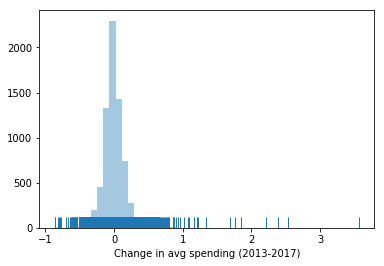

In [8]:
sns.distplot(tuple(notnull_17_change.iloc[:,4][notnull_17_change.iloc[:,4] < 10]), kde=False, rug=True)
plt.xlabel("Change in avg spending (2013-2017)")
plt.show()

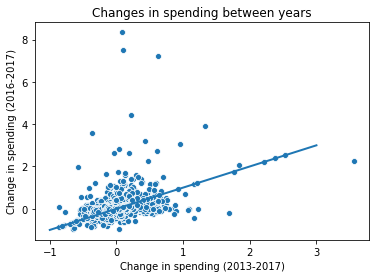

In [9]:
sns.scatterplot(
    data = notnull_17_change[notnull_17_change['annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017'] < 10],
    x = 'annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017',
    y = 'change_in_average_spending_per_dosage_unit_2016_2017'
)
plt.xlabel("Change in spending (2013-2017)")
plt.ylabel("Change in spending (2016-2017)")
plt.title("Changes in spending between years")
plt.plot([-1, 3], [-1, 3], linewidth = 2)
plt.show()

In [10]:
top_100_13_to_17_change = notnull_17_change.sort_values('annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017', ascending = False).reset_index(drop=True).iloc[0:100,:]

In [11]:
# import drug use
drug_uses_17 = dw.query('dakimova/medicare-top-drugs-analysis', 'SELECT * FROM drug_use_information_4').dataframe

In [12]:
drug_uses_17['brand_name'] = drug_uses_17['brand_name'].str.lower().str.strip()
drug_uses_17['generic_name'] = drug_uses_17['generic_name'].str.lower().str.strip()
drug_uses_17['drug_uses'] = drug_uses_17['drug_uses'].str.lower().str.strip()

In [13]:
drug_uses_17.sample(20)

,brand_name,generic_name,drug_uses
10,acamprosate calcium,acamprosate calcium,this medication is used along with counseling ...
1760,nitromist,nitroglycerin,this medication is used to relieve chest pain ...
1460,loprox,ciclopirox,this medication is used to treat a certain sca...
1681,nalbuphine hcl,nalbuphine hcl,drug uses not available
2774,xerese,acyclovir/hydrocortisone,this medication contains 2 ingredients: acyclo...
300,betimol,timolol,this medication is used to treat high pressure...
1384,lessina,levonorgestrel-ethin estradiol,this combination hormone medication is used to...
2559,triesence,triamcinolone acetonide/pf,drug uses not available
1777,norpramin,desipramine hcl,desipramine is used to treat depression. this ...
907,esbriet,pirfenidone,pirfenidone is used to treat a certain lung di...


In [14]:
drug_uses_17['brand_name'] = drug_uses_17['brand_name'].str.replace('*', '')

In [15]:
top_13_to_17_uses = pd.merge(top_100_13_to_17_change, drug_uses_17, on = ['brand_name', 'generic_name'], how = 'left', suffixes = ('_s', '_i'))
top_13_to_17_uses[['brand_name', 'generic_name', 'drug_uses']].head(20)

,brand_name,generic_name,drug_uses
0,virt-nate,"prenatal vit,cal 73/iron/folic",this medication is a multivitamin and iron pro...
1,sodium acetate,sodium acetate,drug uses not available
2,azithromycin,azithromycin,azithromycin is used to treat a wide variety o...
3,orbactiv,oritavancin diphosphate,this medication is an antibiotic used to treat...
4,fluphenazine hcl,fluphenazine hcl,this medication is used to treat symptoms of a...
5,potassium chloride,potassium chloride,this medication is a mineral supplement used t...
6,pro comfort alcohol pads,alcohol antiseptic pads,drug uses not available
7,acyclovir,acyclovir,acyclovir is used to treat infections caused b...
8,piperacillin-tazobactam,piperacillin sodium/tazobactam,piperacillin/tazobactam is used to treat a wid...
9,thiola,tiopronin,this medication is used to prevent kidney ston...


In [16]:
# did all drugs have a match in the drug uses dataset?
sum(pd.isnull(top_13_to_17_uses['drug_uses']))
# yes

0

In [17]:
spend_2017.drop(['annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017', 'change_in_average_spending_per_dosage_unit_2016_2017'], axis=1, inplace=True)

In [18]:
spend_2017

,brand_name,generic_name,manufacturer,year,average_spending_per_beneficiary,average_spending_per_claim,average_spending_per_dosage_unit_weighted,total_beneficiaries,total_claims,total_dosage_units,total_spending
0,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2013,58.356605,21.603679,0.182160,1620.0,4376.0,5.189200e+05,9.453770e+04
1,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2014,59.073167,21.936957,0.182074,2087.0,5620.0,6.771600e+05,1.232857e+05
2,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2015,58.676413,23.140136,0.186878,2283.0,5789.0,7.175480e+05,1.339582e+05
3,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2016,63.082217,24.270027,0.206922,3423.0,8897.0,1.050323e+06,2.159304e+05
4,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2017,72.061722,25.358471,0.216163,3020.0,8582.0,1.012618e+06,2.176264e+05
5,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,2014,41.963763,23.776391,0.200576,1289.0,2275.0,2.697250e+05,5.409129e+04
6,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,2015,45.517725,24.979943,0.199884,4330.0,7890.0,9.860700e+05,1.970918e+05
7,abacavir,abacavir sulfate,aurobindo pharm,2014,2006.528813,400.201358,6.368604,2754.0,13808.0,8.676910e+05,5.525980e+06
8,abacavir,abacavir sulfate,aurobindo pharm,2015,1795.047838,340.091081,5.504788,3696.0,19508.0,1.205223e+06,6.634497e+06
9,abacavir,abacavir sulfate,aurobindo pharm,2016,1554.561719,281.823637,4.589049,4602.0,25385.0,1.558949e+06,7.154093e+06


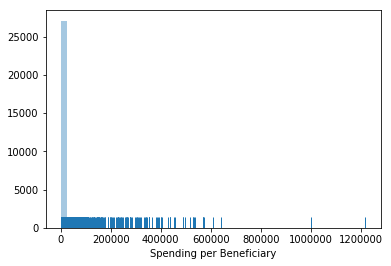

In [19]:
sns.distplot(tuple(spend_2017['average_spending_per_beneficiary'][spend_2017['average_spending_per_beneficiary'].notnull()]), kde=False, rug=True)
plt.xlabel("Spending per Beneficiary")
plt.show()

In [20]:
drug_uses_17

,brand_name,generic_name,drug_uses
0,1st tier unifine pentips,"pen needle, diabetic",drug uses not available
1,1st tier unifine pentips plus,"pen needle, diabetic",drug uses not available
2,abacavir,abacavir sulfate,this drug is used with other hiv medications t...
3,abacavir-lamivudine,abacavir sulfate/lamivudine,this product contains 2 drugs: abacavir and la...
4,abacavir-lamivudine-zidovudine,abacavir/lamivudine/zidovudine,"this product contains 3 drugs: abacavir, lamiv..."
5,abelcet,amphotericin b lipid complex,this medication is used to treat a variety of ...
6,abilify,aripiprazole,aripiprazole is used to treat certain mental/m...
7,abilify maintena,aripiprazole,extended-release aripiprazole injection is use...
8,abraxane,paclitaxel protein-bound,this medication is used to treat certain cance...
9,absorica,isotretinoin,this medication is used to treat severe cystic...


In [27]:
# how many drugs do not have associated uses?
print(len(drug_uses_17[drug_uses_17['drug_uses'] == "drug uses not available"].index))
drug_uses_17[drug_uses_17['drug_uses'] == "drug uses not available"].sample(20)

253


,brand_name,generic_name,drug_uses
2605,ulticare,"syr-nd,ins,0.5/container,empty",drug uses not available
1236,insulin syringe,"syrge-ndl,ins 0.3 ml half mark",drug uses not available
1970,phenobarbital sodium,phenobarbital sodium,drug uses not available
2606,ulticare,"syring-needl,disp,insul,0.3 ml",drug uses not available
1439,lite touch,"syring-needl,disp,insul,0.3 ml",drug uses not available
2078,pro comfort alcohol pads,alcohol antiseptic pads,drug uses not available
2702,vgo 20,"sub-q insulin device, 20 unit",drug uses not available
570,comfort ez,"syringe-needle,insulin,0.5 ml",drug uses not available
1498,magnesium sulfate-d5w,magnesium sulfate/d5w,drug uses not available
1972,phentolamine mesylate,phentolamine mesylate,drug uses not available


Items that do not have drug uses include medical tools (such as syringes and bandages), electrolytes (dextrose, magnesium sulfate), and drugs such as phenobarbital sodium which should have a use (epilepsy treatment, and others), but are not listed for some reason.

In [29]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'were', 'was', 'by', "don't", 'such', 'doing', 'your', 'has', 'needn', 'with', 'both', 'into', 'of', "you'd", 'him', 'yourselves', 'doesn', "mightn't", 'wasn', 'its', 'under', 'and', 'herself', 'are', 're', 'below', 'to', 'do', 'own', 'who', 'won', 'm', 'y', 'is', 'o', 'then', "aren't", 'didn', 'out', 'itself', "you'll", 'when', 'be', 'very', 'up', 'after', 'a', 'them', 'between', 'it', 'at', 've', 'you', 'hadn', "shouldn't", "wasn't", "shan't", 'no', 'aren', 'i', 'on', 'had', 'yours', 'or', 'through', 'all', 'should', 'does', 'ma', "hadn't", "haven't", 'those', 's', "needn't", 'their', 'most', 'this', 'have', 'an', 'same', 'above', 'will', 'theirs', 'in', 'but', 'before', 'any', 'further', "wouldn't", 'me', 'been', 'having', "isn't", 'how', 'until', 't', 'hers', 'some', 'they', 'why', 'where', 'so', 'than', 'wouldn', "couldn't", 'can', 'isn', "you've", 'now', 'only', 'hasn', 'once', 'while', 'here', 'she', 'whom', 'mustn', "didn't", 'his', 'themselves', "that'll", 'weren', 'these', '

In [32]:
uses_17_tokens = drug_uses_17['drug_uses'].apply(word_tokenize)
uses_17_tokens.head()

0                         [drug, uses, not, available]
1                         [drug, uses, not, available]
2    [this, drug, is, used, with, other, hiv, medic...
3    [this, product, contains, 2, drugs, :, abacavi...
4    [this, product, contains, 3, drugs, :, abacavi...
Name: drug_uses, dtype: object

In [77]:
# test 1
not_stop = []
for word in set(uses_17_tokens[4]):
    if word not in stop_words and word.isalpha():
        not_stop.append(word)

In [82]:
#test 2
uses_17_tag_token = nltk.pos_tag(uses_17_tokens[20])
words_interest = []
for x,y in uses_17_tag_token:
    if y == "NN" or y == "JJ" and x not in stop_words:
        words_interest.append(x)

In [83]:
set(words_interest)

{'acetazolamide',
 'advice',
 'altitude',
 'amount',
 'ascent',
 'body',
 'breath',
 'buildup',
 'care',
 'certain',
 'climb',
 'complete',
 'congestive',
 'diuretic',
 'dizziness',
 'drug',
 'edema',
 'effective',
 'eye',
 'failure',
 'feet/3,048',
 'first',
 'fluid',
 'glaucoma',
 'headache',
 'health',
 'heart',
 'height',
 'high',
 'individual',
 'information',
 'mal',
 'medical',
 'medication',
 'nausea',
 'new',
 'note',
 'open-angle',
 'period',
 'pill',
 'possible',
 'problem',
 'product',
 'professional',
 'safe',
 'short',
 'shortness',
 'sickness',
 'slow',
 'specific',
 'summary',
 'time',
 'tiredness',
 'type',
 'unlocalized',
 'useful',
 'water'}

In [168]:
uses_sml = uses_17_tokens[0:10]

#uses_17_tag_token = nltk.pos_tag(uses_17_tokens[20])
#words_interest = []
#for x,y in uses_17_tag_token:
#    if y == "NN" or y == "JJ" and x not in stop_words:
#        words_interest.append(x)

In [169]:
uses_test = []
for use in uses_sml:
    use_tag = nltk.pos_tag(use)
    words_interest = []
    for x,y in use_tag:
        if (y == "NN" or y == "JJ") and x not in stop_words and x not in words_interest:
            words_interest.append(x)
    print(len(words_interest))
    uses_test.append(words_interest)

2
2
51
52
54
24
42
40
25
38


In [170]:
uses_sml

0                         [drug, uses, not, available]
1                         [drug, uses, not, available]
2    [this, drug, is, used, with, other, hiv, medic...
3    [this, product, contains, 2, drugs, :, abacavi...
4    [this, product, contains, 3, drugs, :, abacavi...
5    [this, medication, is, used, to, treat, a, var...
6    [aripiprazole, is, used, to, treat, certain, m...
7    [extended-release, aripiprazole, injection, is...
8    [this, medication, is, used, to, treat, certai...
9    [this, medication, is, used, to, treat, severe...
Name: drug_uses, dtype: object

In [175]:
test = drug_uses_17.loc[0:9,:].copy()
test['uses_tokens'] = uses_test
# result:
test

,brand_name,generic_name,drug_uses,uses_tokens
0,1st tier unifine pentips,"pen needle, diabetic",drug uses not available,"[drug, available]"
1,1st tier unifine pentips plus,"pen needle, diabetic",drug uses not available,"[drug, available]"
2,abacavir,abacavir sulfate,this drug is used with other hiv medications t...,"[drug, hiv, infection, amount, body, immune, s..."
3,abacavir-lamivudine,abacavir sulfate/lamivudine,this product contains 2 drugs: abacavir and la...,"[product, abacavir, lamivudine, hiv, infection..."
4,abacavir-lamivudine-zidovudine,abacavir/lamivudine/zidovudine,"this product contains 3 drugs: abacavir, lamiv...","[product, abacavir, lamivudine, zidovudine, hi..."
5,abelcet,amphotericin b lipid complex,this medication is used to treat a variety of ...,"[medication, variety, serious, fungal, regular..."
6,abilify,aripiprazole,aripiprazole is used to treat certain mental/m...,"[aripiprazole, certain, mental/mood, bipolar, ..."
7,abilify maintena,aripiprazole,extended-release aripiprazole injection is use...,"[extended-release, aripiprazole, injection, me..."
8,abraxane,paclitaxel protein-bound,this medication is used to treat certain cance...,"[medication, certain, breast, lung, pancreatic..."
9,absorica,isotretinoin,this medication is used to treat severe cystic...,"[medication, severe, cystic, acne, nodular, tr..."


In [177]:
uses_full = []
for use in uses_17_tokens:
    use_tag = nltk.pos_tag(use)
    words_interest = []
    for x,y in use_tag:
        if (y == "NN" or y == "JJ") and x not in stop_words and x not in words_interest:
            words_interest.append(x)
    uses_full.append(words_interest)

In [181]:
print(len(uses_full))
print(len(drug_uses_17.index))

2879
2879


In [182]:
drug_uses_17['uses_tokens'] = uses_full

In [184]:
drug_uses_17.sample(20)

,brand_name,generic_name,drug_uses,uses_tokens
1287,janumet xr,sitagliptin phos/metformin hcl,sitagliptin/metformin is used with a proper di...,"[sitagliptin/metformin, proper, diet, exercise..."
1748,nilutamide,nilutamide,this medication is used to treat men with pros...,"[medication, prostate, cancer, surgery, remova..."
2457,terazol 7,terconazole,this medication is used to treat vaginal yeast...,"[medication, vaginal, yeast, terconazole, burn..."
847,emend,aprepitant,aprepitant is used with other medications to h...,"[aprepitant, nausea, vomiting, cancer, drug, t..."
1586,metoprolol succinate,metoprolol succinate,this medication is a beta-blocker used to trea...,"[medication, beta-blocker, pain, angina, heart..."
2223,riluzole,riluzole,this medication is used to treat a certain typ...,"[medication, certain, type, nerve, disease, am..."
1037,fosamax,alendronate sodium,alendronate is used to prevent and treat certa...,"[alendronate, certain, bone, loss, osteoporosi..."
1493,magellan insulin safety syrng,"syringe,needle,insuln,safe,1ml",drug uses not available,"[drug, available]"
1006,fluoride,fluoride (sodium),this medication is used to prevent cavities. i...,"[medication, resistant, acid, bacteria, talk, ..."
314,bisoprolol-hydrochlorothiazide,bisoprolol/hydrochlorothiazide,this combination medication is used to treat h...,"[combination, medication, high, blood, pressur..."


In [187]:
drug_uses_17['uses_tokens'].apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,drug,available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,drug,available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,drug,hiv,infection,amount,body,immune,system,chance,new,cancer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,product,abacavir,lamivudine,hiv,infection,amount,body,immune,system,chance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,product,abacavir,lamivudine,zidovudine,hiv,infection,amount,body,immune,system,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,medication,variety,serious,fungal,regular,amphotericin,treatment,growth,fungi,note,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,aripiprazole,certain,mental/mood,bipolar,disorder,schizophrenia,tourette,irritability,autistic,combination,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,extended-release,aripiprazole,injection,mental/mood,disorder,schizophrenia,medication,concentration,nervous,active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,medication,certain,breast,lung,pancreatic,cancer,paclitaxel,class,chemotherapy,growth,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,medication,severe,cystic,acne,nodular,treatment,e.g.,benzoyl,peroxide,clindamycin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
